In [247]:
import pandas as pd
import datetime as dt
from wordcloud import WordCloud, STOPWORDS 
import nltk
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [219]:
df = pd.read_csv("Reddit_Election_Posts.csv")

In [220]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [221]:
df['url'].astype(str).str[0:]

0        https://www.reddit.com/r/Liberal/comments/9m2d...
1        https://www.reddit.com/r/Liberal/comments/9m2f...
2        https://www.reddit.com/r/Liberal/comments/9m2i...
3        https://www.reddit.com/r/Liberal/comments/9m2k...
4        https://www.reddit.com/r/Liberal/comments/9m3y...
                               ...                        
27825    http://www.openmarket.org/2012/07/10/quotas-li...
27826    http://www.marketplace.org/topics/wealth-pover...
27827    http://www.denverpost.com/politics-national/20...
27828    http://thoughtcatalog.com/2012/american-discor...
27829    https://www.reddit.com/r/moderatepolitics/comm...
Name: url, Length: 27830, dtype: object

In [222]:
#get posted date, add to df
_timestamp = df["created"].apply(get_date)
df = df.assign(timestamp = _timestamp)

#find election year
df['election year']=df['year'].astype(str).str[0:4]

In [324]:
type(str(df['body'][9]))

str

In [327]:
#feature engineering

url_agency = []
title_len = []
body_del = []
body_removed = []
body_len = []

for x in range(0,len(df)):
    #find url agency, i.e. content source
    if "www." in df['url'][x]:
        y=(df['url'][x].find("."))
        z=df['url'][x].find(".",y+1)
        url_agency.append(df['url'][x][y+1:z])
    
    elif "redd.it" in df['url'][x]:
        url_agency.append('reddit')
    elif "https://" in df['url'][x]:
        z=df['url'][x].find(".",8)
        url_agency.append(df['url'][x][8:z])
    else:
        z=df['url'][x].find(".",7)
        url_agency.append(df['url'][x][7:z])
    
    #find length of post title
    title_len.append(len(df['title'][x]))
    
    if "removed" in str(df['body'][x]):
        body_removed.append(1)
    else:
        body_removed.append(0)
        
    if "deleted" in str(df['body'][x]):
        body_del.append(1)
    else:
        body_del.append(0)

       
    body_len.append(len(str(df['body'][x])))


df['url agency']=url_agency
df['title length']=title_len
df['body removed by moderator']=body_removed
df['body deleted by user']=body_del
df['body length']=body_len

In [328]:
df.head(10)

,subreddit,year,title,score,id,url,comms_num,created,body,timestamp,election year,url agency,title length,body removed by moderator,body deleted by user,body length
0,Liberal,2018-11-06,Changing party affiliation in response to Kave...,13,9m2dtt,https://www.reddit.com/r/Liberal/comments/9m2d...,49,1.538914e+09,"Hey everyone,\n\nSo, I've long tried to be the...",2018-10-07 08:03:17,2018,reddit,51,0,0,1815
1,Liberal,2018-11-06,My mother and I have decided to cut off commun...,1,9m2f5d,https://www.reddit.com/r/Liberal/comments/9m2f...,0,1.538914e+09,[removed],2018-10-07 08:09:44,2018,reddit,65,1,0,9
2,Liberal,2018-11-06,What can I do to help?,0,9m2ixb,https://www.reddit.com/r/Liberal/comments/9m2i...,10,1.538915e+09,[deleted],2018-10-07 08:28:44,2018,reddit,22,0,1,9
3,Liberal,2018-11-06,The current World Population is estimated to b...,4,9m2kyh,https://www.reddit.com/r/Liberal/comments/9m2k...,8,1.538916e+09,[deleted],2018-10-07 08:39:28,2018,reddit,145,0,1,9
4,Liberal,2018-11-06,"С кем поведешься, от того и наберешься",1,9m3ygv,https://www.reddit.com/r/Liberal/comments/9m3y...,0,1.538935e+09,[removed],2018-10-07 13:49:12,2018,reddit,38,1,0,9
5,Liberal,2018-11-06,Was the effort of trying to stop Kavanaugh fro...,5,9m48rx,https://www.reddit.com/r/Liberal/comments/9m48...,27,1.538939e+09,[deleted],2018-10-07 14:57:37,2018,reddit,83,0,1,9
6,Liberal,2018-11-06,Can Kavanaugh be impeached?,4,9m5qno,https://www.reddit.com/r/Liberal/comments/9m5q...,21,1.538954e+09,If there's a proper investigation and it's cle...,2018-10-07 19:11:39,2018,reddit,27,0,0,133
7,Liberal,2018-11-06,This will either prove that liberals are the F...,3,9m5xj2,https://www.reddit.com/r/Liberal/comments/9m5x...,0,1.538955e+09,[removed],2018-10-07 19:36:13,2018,reddit,148,1,0,9
8,Liberal,2018-11-06,New Brunswick's 2018 Election - Explanation - ...,1,9m60wu,https://www.youtube.com/watch?v=JhVTRUyZviw,1,1.538956e+09,NaN,2018-10-07 19:48:04,2018,youtube,62,0,0,3
9,Liberal,2018-11-06,"'Let's Do This': After Owning Liberals Today, ...",0,9m62mn,https://townhall.com/tipsheet/mattvespa/2018/1...,0,1.538956e+09,NaN,2018-10-07 19:54:04,2018,townhall,109,0,0,3


In [225]:
df['subreddit'].value_counts()

Conservative        24175
Liberal              2916
moderatepolitics      739
Name: subreddit, dtype: int64

In [226]:
df['election year'].value_counts()

2018    10308
2012     7319
2016     5603
2014     4600
Name: election year, dtype: int64

## Scores and Number of Comments per Post

**Extreme Outlier Note:**
There is an extreme outlier in the conservative thread titled: "Why we won", which happened after the 2016 election. This must have happened late in the evening so that it still technically happened on the election day. 
<br>
Link [here](https://www.reddit.com/r/Conservative/comments/5c3xah/why_we_won/)

<Figure size 1332x756 with 0 Axes>

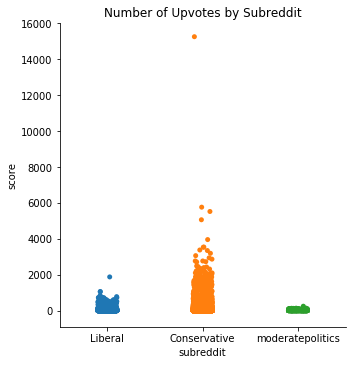

In [251]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.catplot(x="subreddit", y="score", data=df);
plt.title("Number of Upvotes by Subreddit")
plt.show()

<Figure size 1332x756 with 0 Axes>

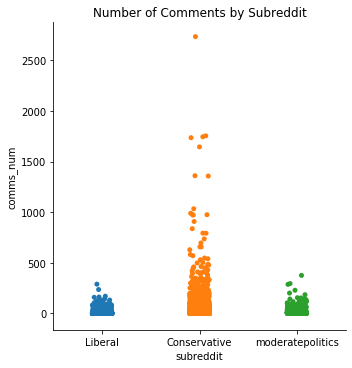

In [250]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
sns.catplot(x="subreddit", y="comms_num", data=df);
plt.title("Number of Comments by Subreddit")
plt.show()

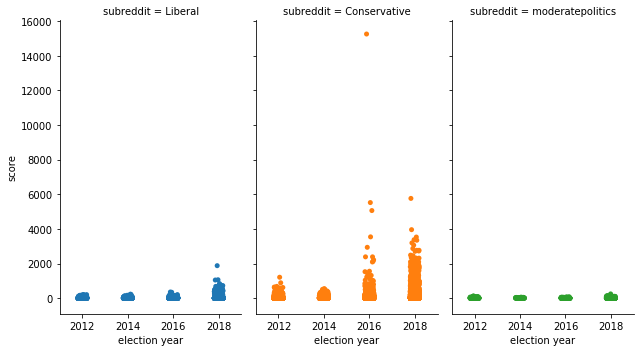

In [255]:
sns.catplot(x="election year", y="score", hue="subreddit",
            col="subreddit", aspect=.6,
             data=df);


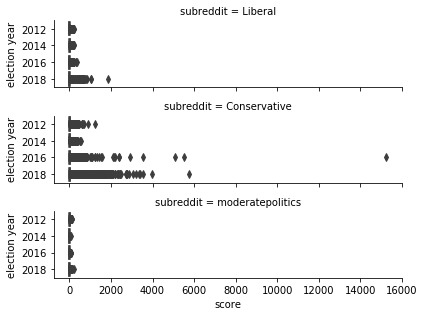

In [260]:
g = sns.catplot(x="score", y="election year", row="subreddit",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df)


## Body Length & Actual Content Per Post

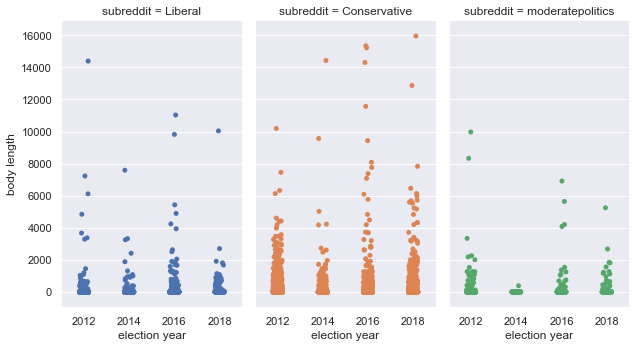

In [331]:
sns.catplot(x="election year", y="body length", hue="subreddit",
            col="subreddit", aspect=.6,
             data=df);



## Overall Trends

#### Posts appear to be up to 300 characters long, which aligns fairly well with twitter specifications

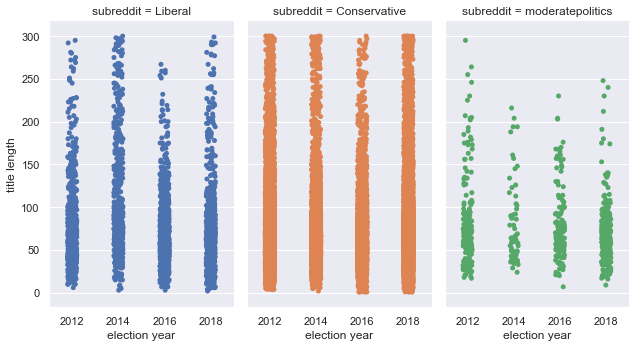

In [334]:
sns.catplot(x="election year", y="title length", hue="subreddit",
            col="subreddit", aspect=.6,
             data=df);



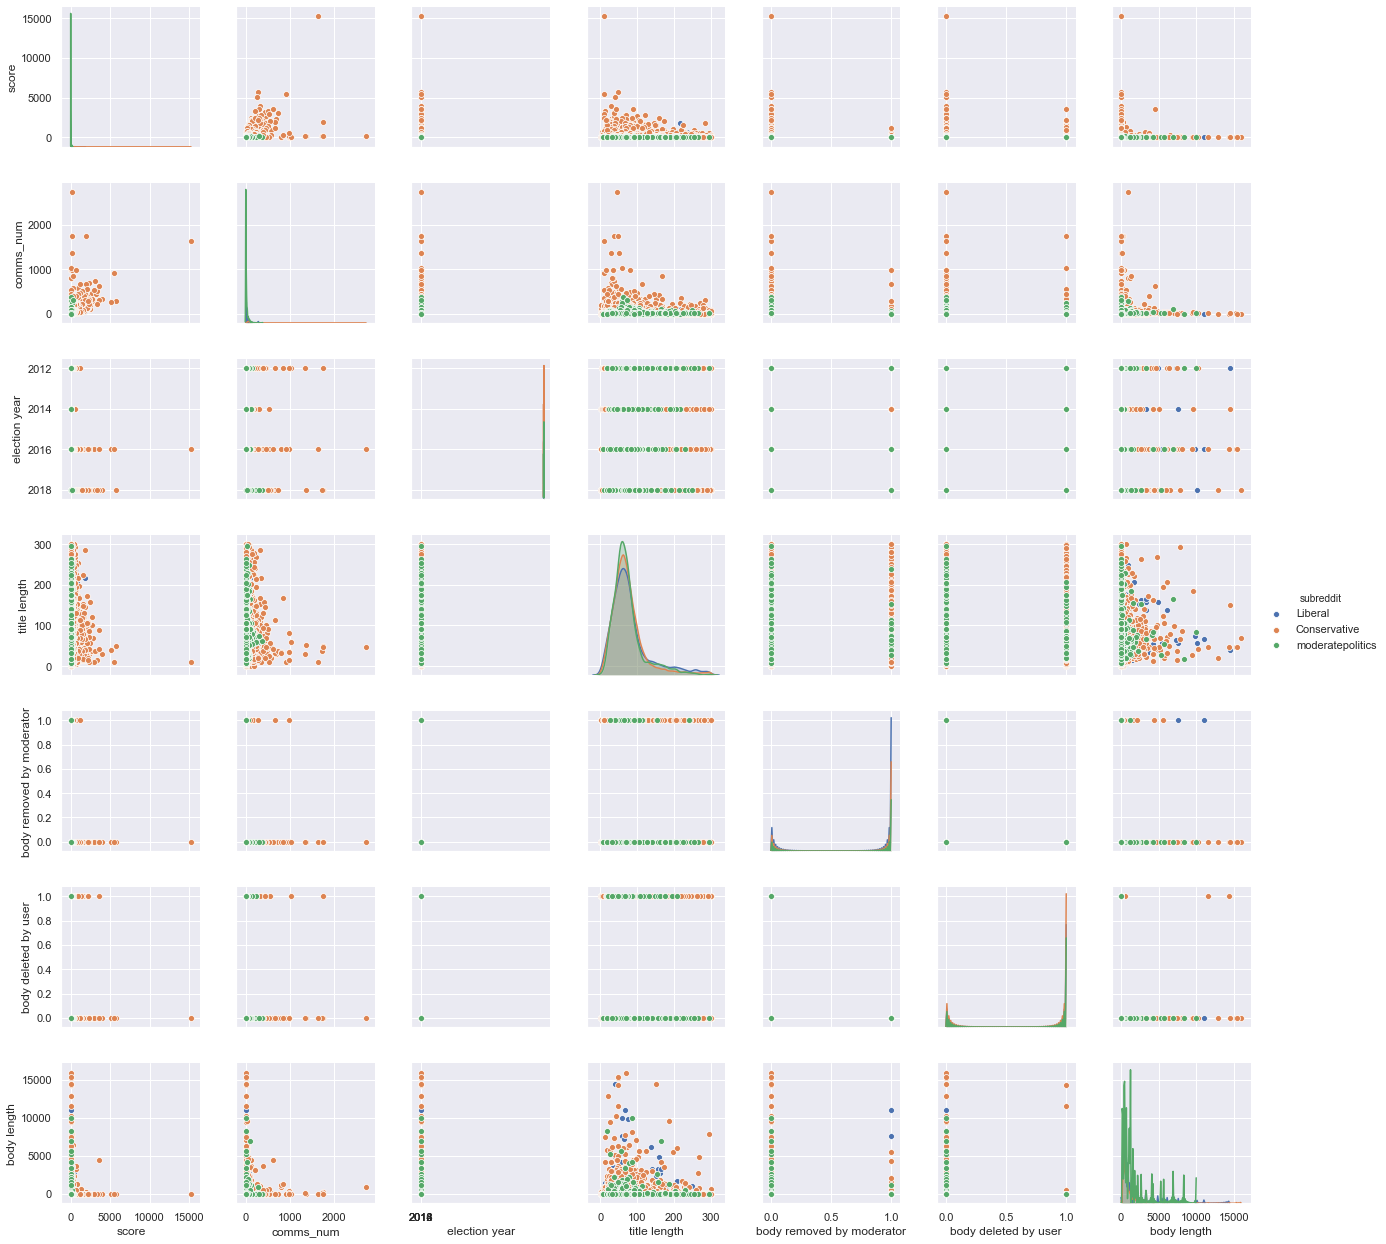

In [335]:
sns.pairplot(data=df.drop(columns=['created']), hue="subreddit");


In [174]:
subreddits = ["Conservative","Liberal","moderatepolitics"]

### News Sources

In [369]:
content_counts = df['url agency'].value_counts()

In [372]:
content_counts[0:30]

reddit                4898
youtube               1394
breitbart              872
i                      602
foxnews                562
youtu                  507
dailycaller            450
nationalreview         441
dailywire              421
thegatewaypundit       393
thehill                383
freebeacon             351
washingtonpost         348
imgur                  330
hotair                 329
nytimes                299
washingtontimes        289
washingtonexaminer     263
townhall               260
politico               247
americanthinker        222
thefederalist          213
twitter                188
nypost                 186
realclearpolitics      186
news                   181
newsbusters            179
m                      157
theblaze               157
pjmedia                155
Name: url agency, dtype: int64

# NLTK Analysis

In [86]:
def stringinize(df):
    comment_words = ' '
    token_list = []
    
    for x in df['title']:

        # typecaste each val to string 
        val = str(x.strip()) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + " "
            token_list.append(words)
    
    return comment_words, token_list



In [180]:
# make NLTK dataset for dictionaries with words for each subreddit
word_dict = { "subreddit":[], 
                "comment_words":[], 
                "token_list":[]}

for x in subreddits:
    df_temp = df.loc[df['subreddit']==x]
    
    
    word_dict["subreddit"].append(str(x))
    
    comment_words, token_list = stringinize(df_temp)
    word_dict["comment_words"].append(comment_words)
    word_dict["token_list"].append(token_list)

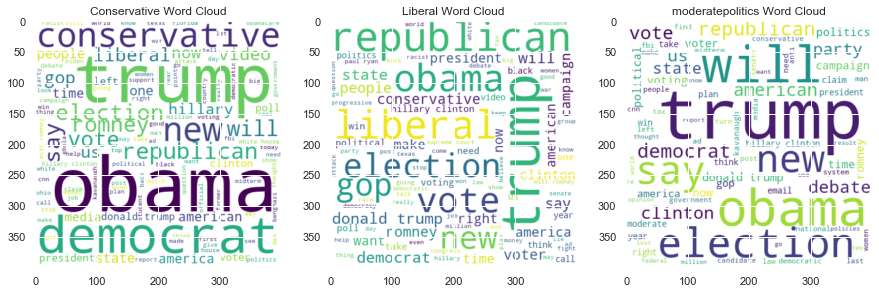

In [354]:
stopwords = set(STOPWORDS)

fig, (ax1, ax2, ax3) = plt.subplots(1,3)

for x, y,z in zip(word_dict['comment_words'], subreddits,[ax1, ax2, ax3]):    
    wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,
                     collocations = True).generate(x) 
  
    # plot the WordCloud image
    #plt.figure(figsize = (5,5), facecolor = None) 
    z.set_title(str(y) + " Word Cloud")
    z.imshow(wordcloud, interpolation="bilinear")

    

In [182]:
#add more stopwords to remove punctuation
stopwords = set(STOPWORDS)

for x in ['-','|']:
    stopwords.add(x)


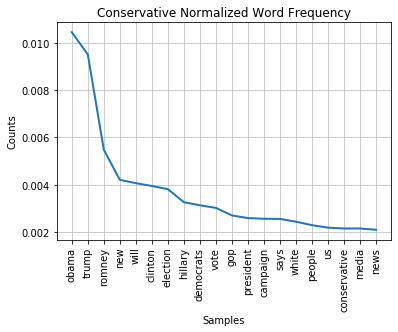

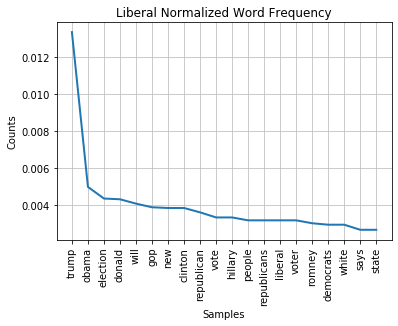

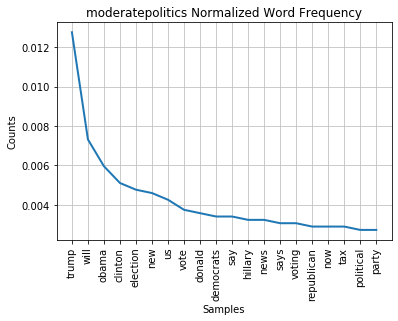

In [190]:
class_list = []
freq_list = []
word_list = []
z=0

for x, y in zip(word_dict['token_list'], subreddits):    
    filtered_sentence = [] 

    for w in x: 
        if w not in stopwords: 
            filtered_sentence.append(w) 


    fd = nltk.FreqDist(filtered_sentence)
    total = fd.N()
    for word in fd:
        fd[word] /= float(total)
    
    fd.plot(20,cumulative=False,title = str(y)+" Normalized Word Frequency")
    
    for word in fd:
        word_list.append(word)
        freq_list.append(fd[word])
        class_list.append(y)
        

In [355]:
len(freq_list)

51722

In [192]:
freq_df = pd.DataFrame({'class':class_list,
                        "word":word_list,
                 "frequency":freq_list})

In [356]:
freq_df_top_conservative = freq_df.loc[freq_df['class']=='Conservative'].sort_values(by=['frequency'],ascending=False).head(30)
word_list = list(freq_df_top_conservative['word'])


In [283]:
top_freq_df = freq_df.loc[freq_df['word'].isin(word_list)]

In [310]:
top_freq_df=top_freq_df.sort_values(by=['frequency'],ascending=False)

## Plot of top 30 conservative words by ideological group

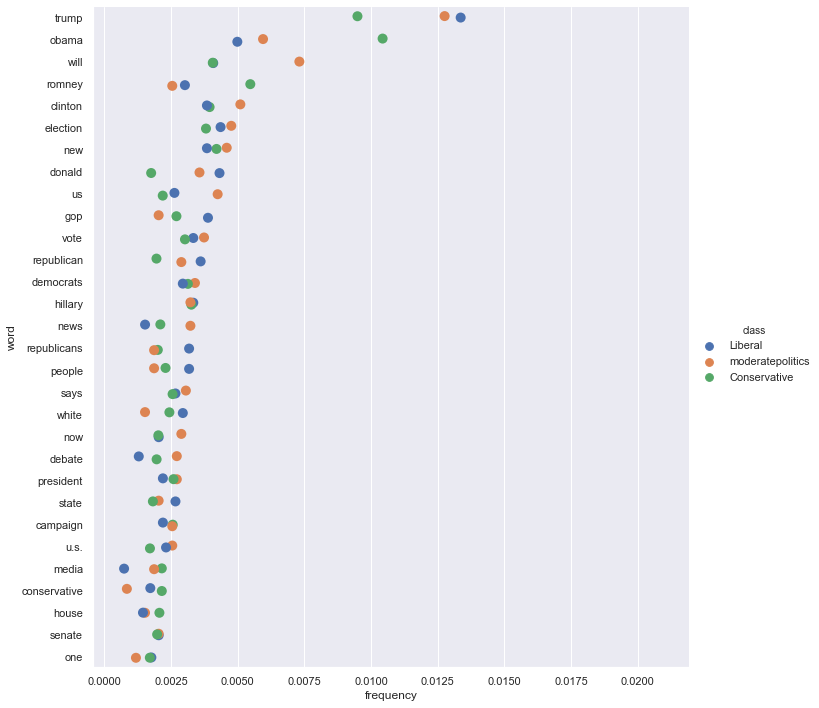

In [366]:


g=sns.catplot(y="word", x="frequency",hue="class", 
             edgecolor=".6",s=10,aspect=15/15,height=10, 
            data=top_freq_df)



In [198]:
freq_df.to_csv("Reddit Word Frequencies.csv",index=False)